<a href="https://colab.research.google.com/github/SheikhSarvar/Email-Campaign-Effectivenes/blob/main/Email_Campaign_Effectiveness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Problem Description**

Most of the small to medium business owners are making effective use of Gmail-based
Email marketing Strategies for offline targeting of converting their prospective customers into
leads so that they stay with them in business.
The main objective is to create a machine learning model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.
Data columns are self-explanatory.

##**Introduction:**
Email Marketing can be defined as a marketing technique in which businesses stay connected with their customers through emails, making them aware about their new products, updates, important notices related to the products they are using.

Most importantly, email marketing allows businesses to build relationships with leads, new customers and past customers. It's a way to communicate directly to the customers in their inbox, at a time that is convenient for them. With the right messaging tone and strategies, emails are one of the most important marketing channels.

We all subscribe to many different kinds of businesses through emails because it's required to do so, sometimes to get digital receipts of the things we bought or to get digital information about the business to stay updated. But many of times we do not tend to read an email due to a number of reasons - to name a few would be- no proper structure, too many images, too many links inside the mail, complex vocabulary used or simply too long emails.

In this problem statement, we will be trying to create machine learning models that characterize and predict whether the mail is ignored, read or acknowledged by the reader. In addition to this, we will be trying to analyze and find all the features that are important for an email to not get ignored.

So let's begin!


## basic

In [ ]:
import pandas as pd 
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modelling
#Train-Test Split
from sklearn.model_selection import train_test_split
#Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

#to ignore warnings
import warnings    
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/data_email_campaign.csv')
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
df.head(5)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
df.sample(5)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
44879,EMA00085007465380,1,1.0,2,E,2,NaN,2,649,4.0,1.0,0
46010,EMA00085111202050,1,3.6,1,NaN,2,13.0,3,484,14.0,0.0,0
51919,EMA00085639182910,2,0.1,1,C,2,30.0,2,840,3.0,0.0,0
42621,EMA00084807572400,1,2.9,1,NaN,2,22.0,2,605,NaN,0.0,0
56133,EMA00086024797250,1,1.0,1,E,2,22.0,2,713,7.0,6.0,0


## EDA

Email Id - It contains the email id's of the customers/individuals

Email Type - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.

Subject Hotness Score - It is the email's subject's score on the basis of how good and effective the content is.

Email Source - It represents the source of the email like sales and marketing or important admin mails related to the product.

Email Campaign Type - The campaign type of the email.

Total Past Communications - This column contains the total previous mails from the same source, the number of communications had.

Customer Location - Contains demographical data of the customer, the location where the customer resides.

Time Email sent Category - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.

Word Count - The number of words contained in the email.

Total links - Number of links in the email.

Total Images - Number of images in the email.

Email Status - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader.

In [ ]:
print(df.shape)

(68353, 12)


In [ ]:
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
#it gives the unique value for each column
print(df.apply(lambda col: col.unique()))

Email_ID                     [EMA00081000034500, EMA00081000045360, EMA0008...
Email_Type                                                              [1, 2]
Subject_Hotness_Score        [2.2, 2.1, 0.1, 3.0, 0.0, 1.5, 3.2, 0.7, 2.0, ...
Email_Source_Type                                                       [2, 1]
Customer_Location                                   [E, nan, B, C, G, D, F, A]
Email_Campaign_Type                                                  [2, 3, 1]
Total_Past_Communications    [33.0, 15.0, 36.0, 25.0, 18.0, nan, 34.0, 21.0...
Time_Email_sent_Category                                             [1, 2, 3]
Word_Count                   [440, 504, 962, 610, 947, 416, 116, 1241, 655,...
Total_Links                  [8.0, 5.0, 16.0, 4.0, 11.0, 6.0, 21.0, nan, 31...
Total_Images                 [0.0, 2.0, 4.0, 16.0, 13.0, 15.0, 5.0, 28.0, 1...
Email_Status                                                         [0, 1, 2]
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [ ]:
df.describe(include='all')

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,68353,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EMA00081000034500,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,NaN,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,NaN,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,NaN,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,NaN,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,NaN,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


In [ ]:
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [ ]:
numeric_features = df.describe().columns

In [ ]:
df.shape

(68353, 12)

In [ ]:
numeric_features

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

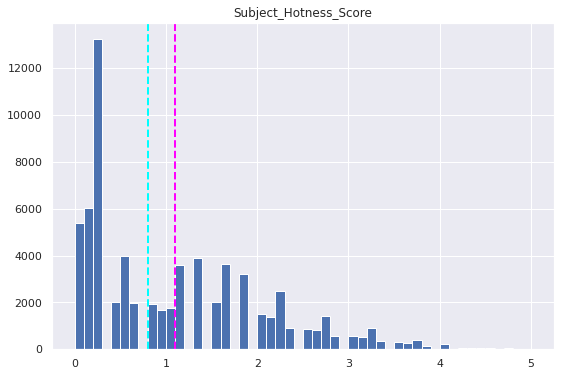

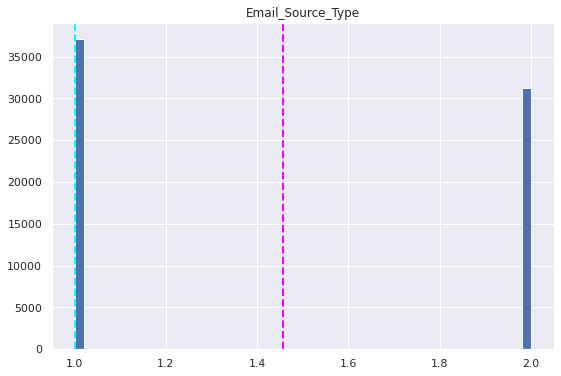

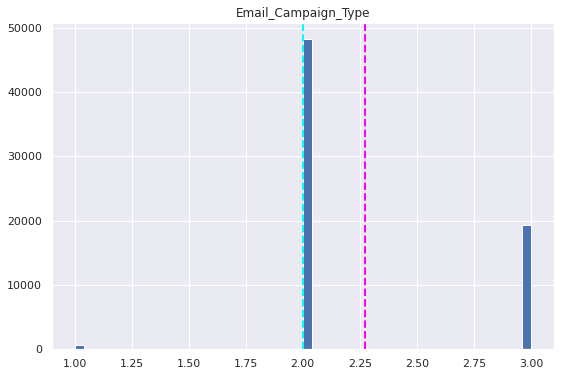

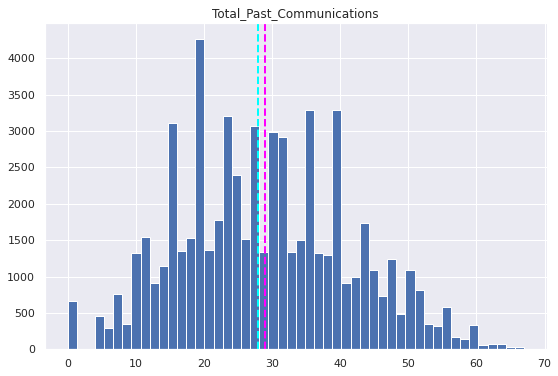

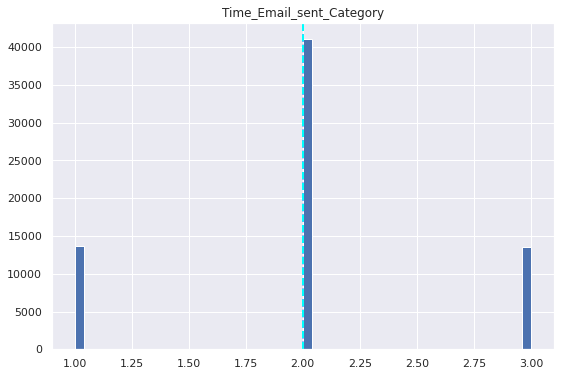

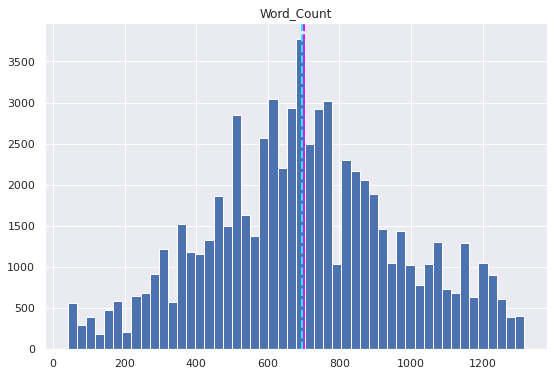

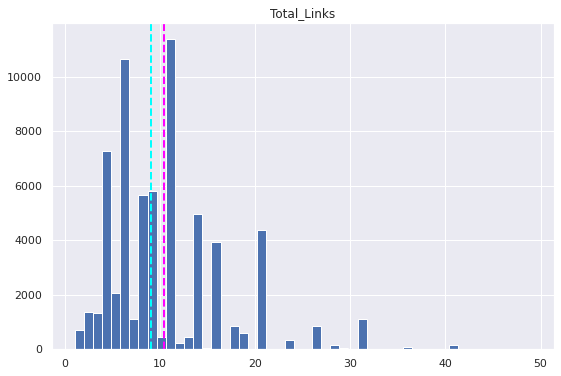

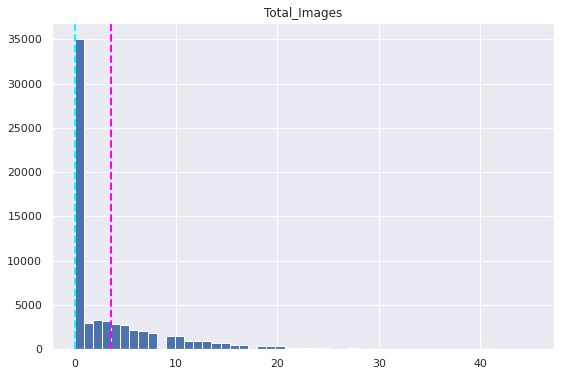

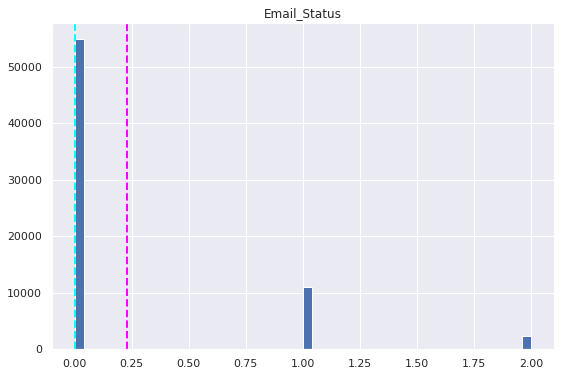

In [ ]:
#This is use for histplot with mean and median

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)   
    ax.set_title(col)
plt.show()

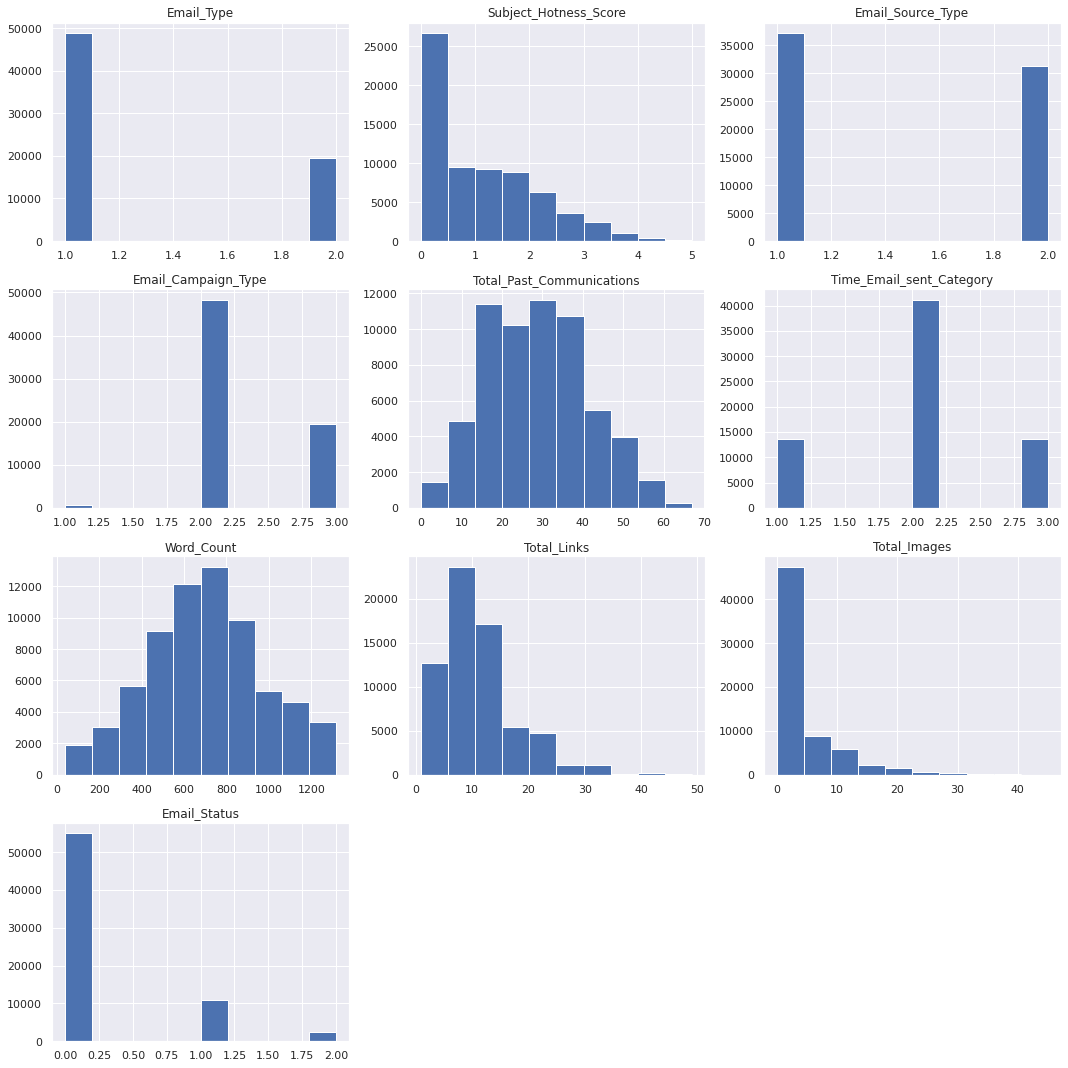

In [ ]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(data=df,ax=ax)
plt.tight_layout()

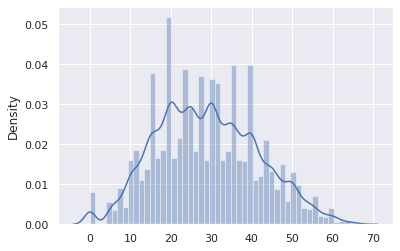

In [ ]:
#let's see the distribution of Total Past Communications to get what majority of the data tends to so that we can fill it accordingly
sns.distplot(x=df['Total_Past_Communications'], hist = True)

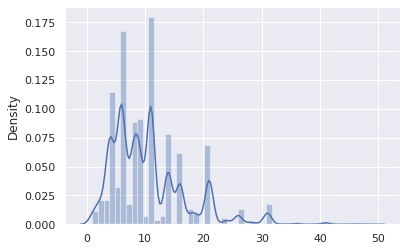

In [ ]:
#let's see the distribution of Total Links to get what majority of the data tends to so that we can fill it accordingly
sns.distplot(x=df['Total_Links'], hist= True)

## correlation plot

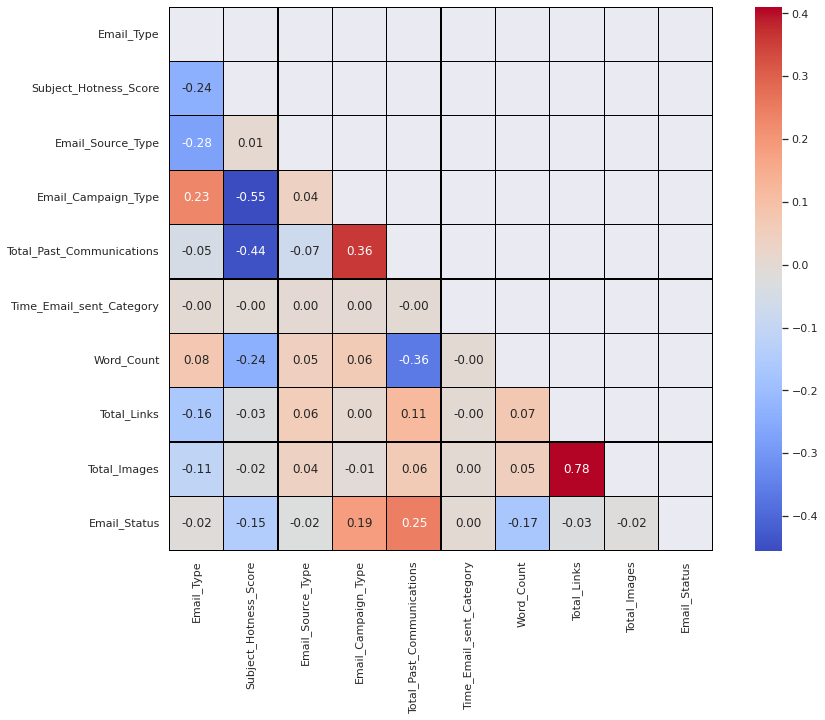

In [ ]:
#Correlation between different variables
corr = df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(15,10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, cbar = True,square = True, fmt = '.2f',mask = mask, cmap='coolwarm',linecolor='black',linewidths=.3,robust=True)

In [ ]:
# the correalation in the table formate
df.corr() 

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
Email_Type,1.000000,-0.235480,-0.275201,0.233565,-0.046962,-0.000581,0.077938,-0.162485,-0.108828,-0.015074
Subject_Hotness_Score,-0.235480,1.000000,0.006142,-0.550676,-0.442073,-0.003665,-0.237531,-0.028225,-0.020582,-0.146531
Email_Source_Type,-0.275201,0.006142,1.000000,0.035797,-0.069844,0.002137,0.048318,0.057706,0.039105,-0.024527
Email_Campaign_Type,0.233565,-0.550676,0.035797,1.000000,0.359699,0.001388,0.063540,0.004822,-0.008546,0.185510
Total_Past_Communications,-0.046962,-0.442073,-0.069844,0.359699,1.000000,-0.000833,-0.363776,0.114112,0.064927,0.246046
Time_Email_sent_Category,-0.000581,-0.003665,0.002137,0.001388,-0.000833,1.000000,-0.000508,-0.001996,0.000114,0.000051
Word_Count,0.077938,-0.237531,0.048318,0.063540,-0.363776,-0.000508,1.000000,0.073461,0.051362,-0.171116
Total_Links,-0.162485,-0.028225,0.057706,0.004822,0.114112,-0.001996,0.073461,1.000000,0.780682,-0.028320
Total_Images,-0.108828,-0.020582,0.039105,-0.008546,0.064927,0.000114,0.051362,0.780682,1.000000,-0.017587
Email_Status,-0.015074,-0.146531,-0.024527,0.185510,0.246046,0.000051,-0.171116,-0.028320,-0.017587,1.000000


In [ ]:
#creating function for returning missing values in Percentage
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()/len(data_frame)
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

In [ ]:
return_missing_values(df)

Total_Images                 0.024534
Total_Links                  0.032200
Total_Past_Communications    0.099849
Customer_Location            0.169634
dtype: float64

In [ ]:
#Creating a function for ploting the barplot for missing values

def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='whitegrid', color_codes='coolwarm')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.xticks(rotation=90)
    plt.show()

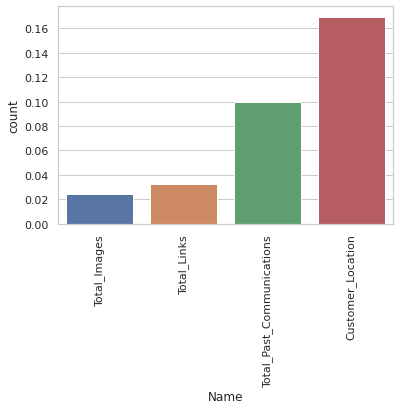

In [ ]:
plot_missing_values(df)

In [ ]:
#creating the funtion for finding unique value and than use for plot the bar plot

def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [ ]:
udf = return_unique_values(df)
print(udf)

                     Features  Uniques
0                    Email_ID    68353
1                  Email_Type        2
2       Subject_Hotness_Score       51
3           Email_Source_Type        2
4           Customer_Location        7
5         Email_Campaign_Type        3
6   Total_Past_Communications       64
7    Time_Email_sent_Category        3
8                  Word_Count      151
9                 Total_Links       37
10               Total_Images       45
11               Email_Status        3


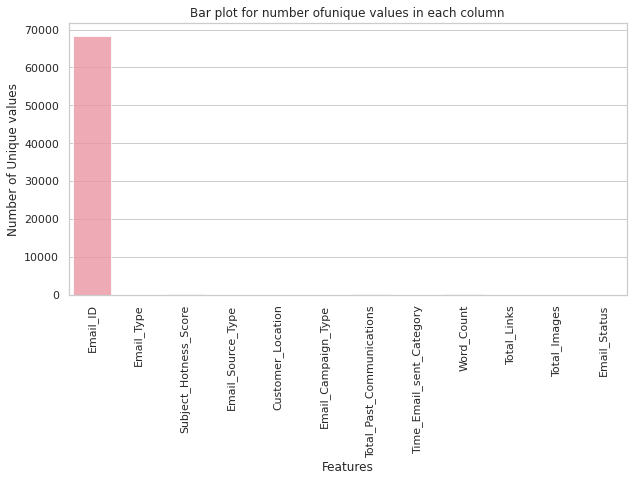

In [ ]:
f, ax = plt.subplots(1,1, figsize=(10,5))#plt.figure(figsize=(10, 5))

sns.barplot(x=udf['Features'], y=udf['Uniques'], alpha=0.8)
plt.title('Bar plot for number ofunique values in each column')
plt.ylabel('Number of Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## Missing Value Treatment

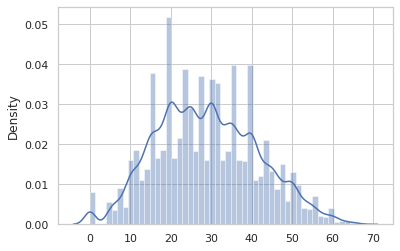

In [ ]:
#let's see the distribution of Total Past Communications to get what majority of the data tends to so that we can fill it accordingly
sns.distplot(x=df['Total_Past_Communications'], hist = True)

In [ ]:
#filling up the null values for total past comm
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean(), inplace = True)

In [ ]:
df.drop('Email_ID',axis=1,inplace=True)

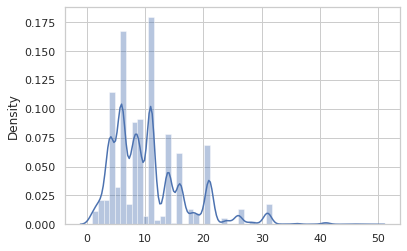

In [ ]:
#let's see the distribution of Total Links to get what majority of the data tends to so that we can fill it accordingly
sns.distplot(x=df['Total_Links'], hist= True)

In [ ]:
#filling up the Total Links Column
df['Total_Links'].fillna(df['Total_Links'].mode()[0], inplace = True)

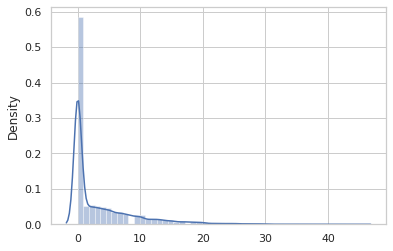

In [ ]:
#total image distribution
sns.distplot(x=df['Total_Images'], hist=True)

In [ ]:
#filling up the Total Images Column
df['Total_Images'].fillna(df['Total_Images'].mode()[0], inplace = True)

In [ ]:
#check for duplicates
df.duplicated().sum()

32

In [ ]:
df['Links_Images']=df['Total_Links']+df['Total_Images']

In [ ]:
#Dropping Total_Images and Total_Links  column
print('Shape of data before dropping ',df.shape)
df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)
print('Shape of data after dropping ',df.shape)

Shape of data before dropping  (68353, 12)
Shape of data after dropping  (68353, 10)


## Categorical type variable

In [ ]:
df.Customer_Location.unique()

array(['E', nan, 'B', 'C', 'G', 'D', 'F', 'A'], dtype=object)

In [ ]:
df.Email_Campaign_Type.unique()

array([2, 3, 1])

In [ ]:
ds_cat = df.select_dtypes(include =['object','int']).copy()
#dropping Word_Count because it's numeric data
ds_cat.drop('Word_Count',axis=1,inplace=True)
ds_cat.head(5)

,Email_Type,Email_Source_Type,Customer_Location,Email_Campaign_Type,Time_Email_sent_Category,Email_Status
0,1,2,E,2,1,0
1,2,1,NaN,2,2,0
2,2,1,B,3,2,1
3,1,2,E,2,2,0
4,1,2,C,3,2,0


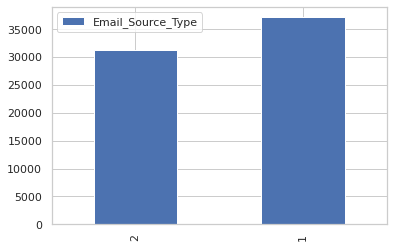

In [ ]:
df.Email_Source_Type.value_counts().sort_values().plot(kind = 'bar',legend=True)

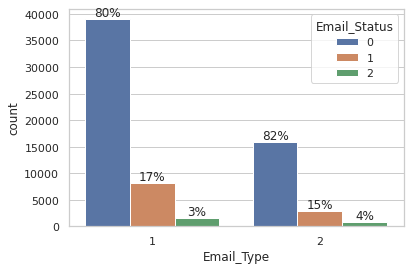

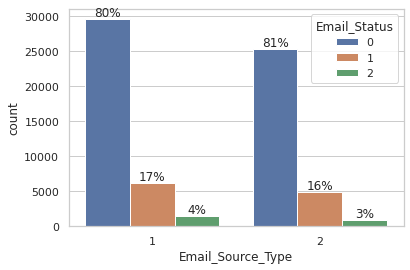

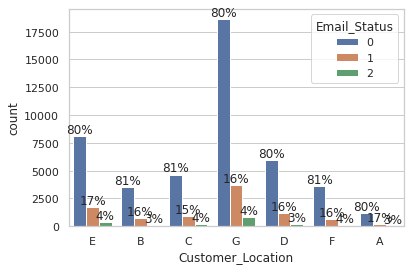

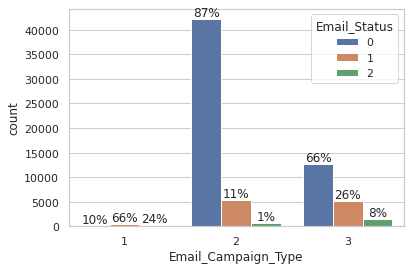

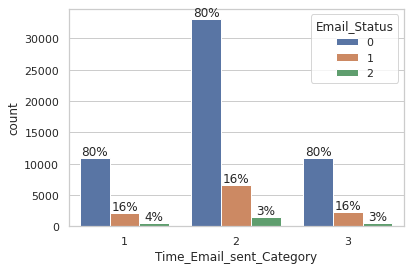

In [ ]:
#countplot for each column

categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
Target_var = ['Email_Status']

for i,value in enumerate(categorical_variables):
  ax = sns.countplot(x=df[value], hue=df[Target_var[0]])
  unique = len([x for x in df[value].unique() if x==x])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  plt.show()

## Continuous type variable

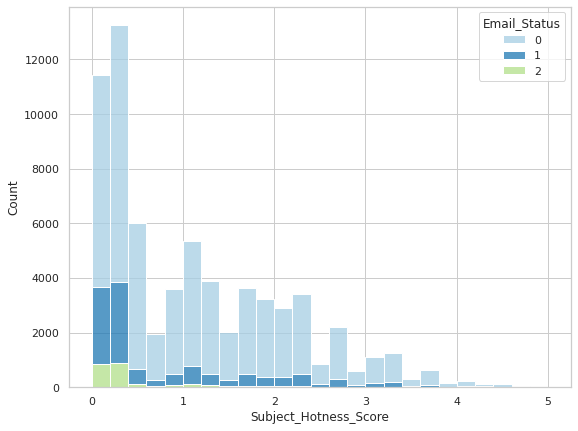

In [ ]:
# This shows distribution of classes 
# Minority classes 1 , 2 : Related to low subject hotness score
# 

plt.figure(figsize = (9,7))
sns.histplot(data = df, x = 'Subject_Hotness_Score', hue = 'Email_Status', bins = 25, palette = 'Paired', multiple = 'stack')
plt.show()

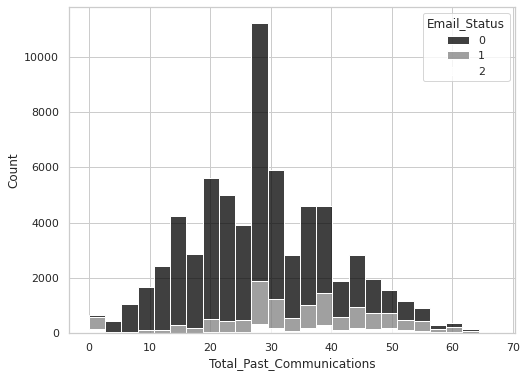

In [ ]:
plt.figure(figsize = (8,6))
sns.histplot(data = df, x = 'Total_Past_Communications', hue = 'Email_Status', bins = 25, palette = 'binary_r', multiple = 'stack')
plt.show()

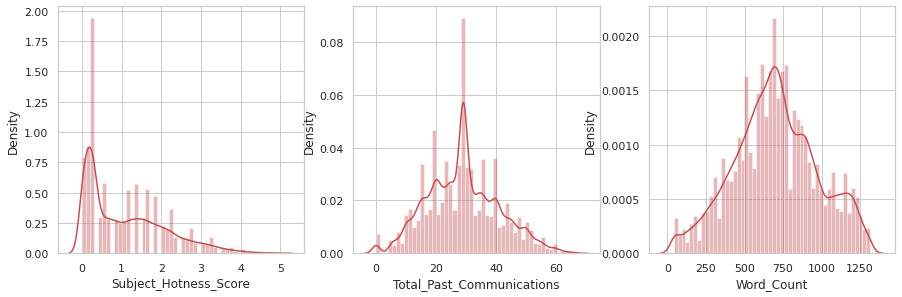

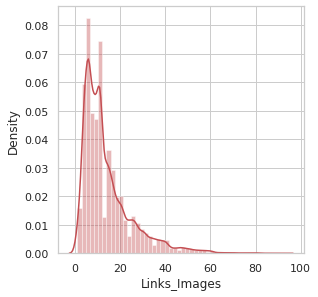

In [ ]:
#distribution of other continuous features and understanding where the data tends to
cont_var = ['Subject_Hotness_Score', 'Total_Past_Communications','Word_Count','Links_Images']
ix = 1
fig = plt.figure(figsize = (15,10))
for c in cont_var:
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.distplot(df[c], ax=ax1,color='r')
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

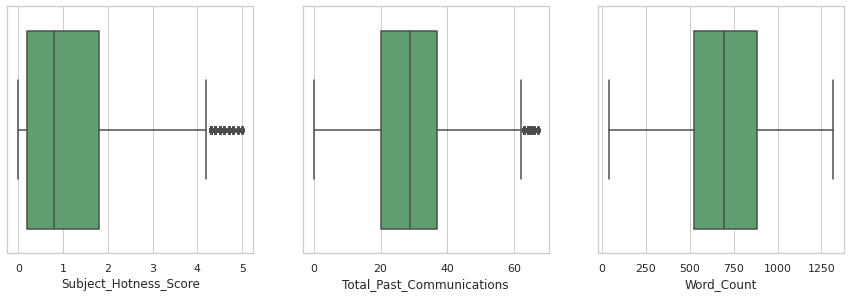

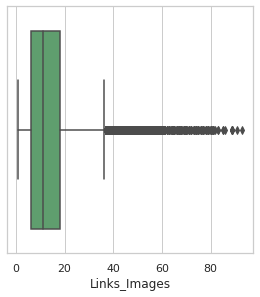

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in cont_var:
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(df[c], ax=ax1,color='g')
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

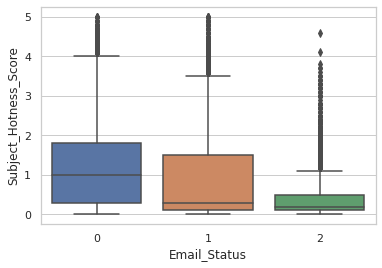

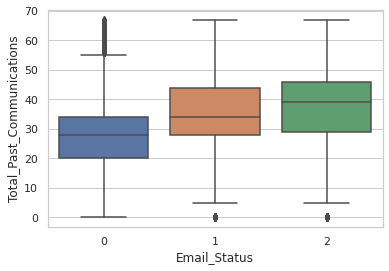

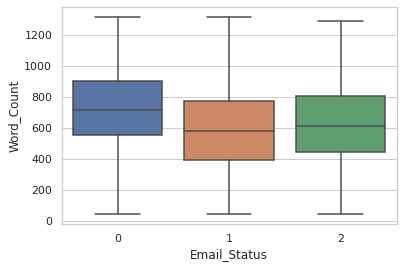

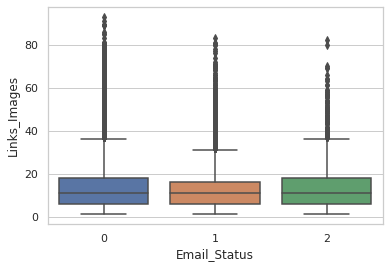

In [ ]:
for i, value in enumerate(cont_var):
 sns.boxplot(x=df['Email_Status'], y= df[value])
 plt.show()

## outliers and Multicollinearity

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Email_ID','Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Total_Links','Total_Images','Email_Status']]])

,variables,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Links_Images,2.629047


## Varaible Importances

In [ ]:
def compute_impurity(feature):
    """
    This function calculates impurity of a feature.
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    impurity = -1 * np.sum(np.log2(probs) * probs)   
    return(round(impurity, 3))


In [ ]:
def comp_feature_information_gain(df, target, descriptive_feature):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy'
    """
    target_entropy = compute_impurity(df[target])

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    
    
    information_gain = target_entropy - feature_remaining_impurity
    

    return(information_gain)

Email_Type : 0.00040000000000006697
Subject_Hotness_Score : 0.03815999999999997
Email_Source_Type : 4.899999999996574e-05
Customer_Location : 0.1425789999999999
Email_Campaign_Type : 0.060697
Total_Past_Communications : 0.08543499999999993
Time_Email_sent_Category : -0.0006019999999999914
Word_Count : 0.04493199999999986
Links_Images : 0.023570999999999898


Text(0.5, 1.0, 'Feature Importance')

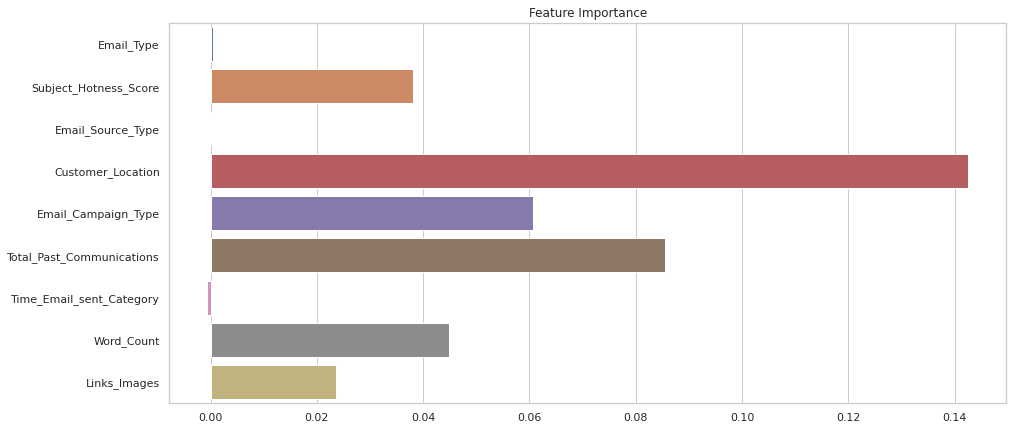

In [ ]:
info_gain={}
for feature in df.drop(columns='Email_Status').columns:
    feature_info_gain = comp_feature_information_gain(df, 'Email_Status', feature)
    info_gain[feature]=feature_info_gain
    print(feature, ':', feature_info_gain)
keys = list(info_gain.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(info_gain[k]) for k in info_gain]
plt.figure(figsize=(15,7))
sns.barplot(y=keys, x=vals)
plt.title('Feature Importance')

## Categorical Variable Encoding

In [ ]:
df=pd.get_dummies(df, columns = ['Customer_Location'])

In [ ]:
df.sample(2)

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Links_Images,Customer_Location_A,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G
18909,1,0.0,1,3,51.00000,2,550,1,11.0,0,0,0,0,0,0,0
11366,2,1.6,1,2,28.93325,2,704,0,8.0,0,0,0,0,0,0,0


## Machine Learning Model

In [ ]:
X =df.drop('Email_Status',axis=1)
y = df['Email_Status']
print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {y.shape}')

Shape of X: (68353, 15)
Shape of Y: (68353,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) 

In [ ]:
X_train.head(2)

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Links_Images,Customer_Location_A,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G
60796,1,0.3,2,3,34.0,1,827,16.0,0,0,0,0,0,0,1
30718,2,1.2,1,2,13.0,3,678,8.0,0,0,0,0,0,0,0


## Imbalances Data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)
x_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)

print('Original dataset shape:', len(y_train))
print('Resampled dataset shape', len(y_train_rus))

Original dataset shape: 51264
Resampled dataset shape 5340


Class=0, n=1780 (33.333%)
Class=1, n=1780 (33.333%)
Class=2, n=1780 (33.333%)


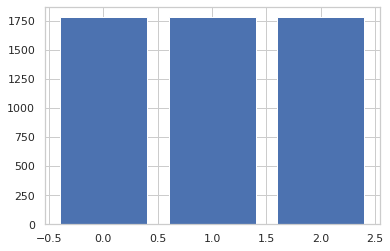

In [ ]:
#visualization of resampled data
def resampled_data_visual(y_train_rus):
  counter = Counter(y_train_rus)
  for key,value in counter.items():
    per = value / len(y_train_rus) * 100
    print('Class=%d, n=%d (%.3f%%)' % (key, value, per))
  # plot the distribution
  plt.bar(counter.keys(), counter.values())
  plt.show()

resampled_data_visual(y_train_rus)

In [ ]:
unique_elements, counts_elements = np.unique(y_train_rus, return_counts=True)
print("Frequency of unique values of the Email_Status:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the Email_Status:
[[   0    1    2]
 [1780 1780 1780]]


In [ ]:
df.groupby('Email_Status').count()['Email_Type']

Email_Status
0    54941
1    11039
2     2373
Name: Email_Type, dtype: int64

In [ ]:
# apply normalization techniques
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Links_Images']
for column in numerical_col:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min()) 

### SMOTE

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_train_smote))

Original dataset shape 51264
Resampled dataset shape 123615


Class=0, n=41205 (33.333%)
Class=1, n=41205 (33.333%)
Class=2, n=41205 (33.333%)


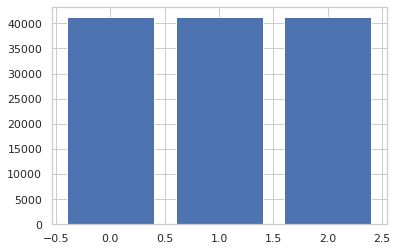

In [ ]:
#visualization of resampled data
resampled_data_visual(y_train_smote)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Initializing the DecisionTreeClassifier
tree = DecisionTreeClassifier()
# Fitting onto the train set for rus
tree.fit(x_train_rus,y_train_rus)
# Fitting onto the train set for smote
tree.fit(x_train_smote,y_train_smote)


DecisionTreeClassifier()

In [ ]:
#for rus
y_train_pred_rus = tree.predict(x_train_rus)
y_test_pred_rus = tree.predict(X_test)
#for smote
y_train_pred_smote = tree.predict(x_train_smote)
y_test_pred_smote = tree.predict(X_test)

In [ ]:
#probs
print("\n Probs for smote rus = ",tree.predict_proba(x_train_smote))
print("\n Probs for smote rus = ",tree.predict_proba(X_test))
#Evaluation 
#Accuracy RUS
print("\n Accuracy for train rus = ",accuracy_score(y_train_rus,y_train_pred_rus))
print("\n Accuracy for test rus = ",accuracy_score(y_test,y_test_pred_rus))
#Accuracy SMOTE
print("\n Accuracy for train smote = ",accuracy_score(y_train_smote,y_train_pred_smote))
print("\n Accuracy for test smote = ",accuracy_score(y_test,y_test_pred_smote))
print('-'*200)
#Confusion Matrix RUS
print("\n Confusion Matrix for train rus = \n",confusion_matrix(y_train_rus,y_train_pred_rus))
print("\n Confusion Matrix for test rus = \n",confusion_matrix(y_test,y_test_pred_rus))
#Confusion Matrix SMOTE
print("\n Confusion Matrix for train smote =\n",confusion_matrix(y_train_smote,y_train_pred_smote))
print("\n Confusion Matrix for test smote =\n",confusion_matrix(y_test,y_test_pred_smote))
print('-'*200)
#Recall RUS
print("\n recall  for train smote = ",recall_score(y_train_rus,y_train_pred_rus, average='weighted'))
print("\n recall  for test rus = ",recall_score(y_test,y_test_pred_rus, average='weighted'))
#Recall SMOTE
print("\n recall  for train smote = ",recall_score(y_train_smote,y_train_pred_smote, average='weighted'))
print("\n recall  for test smote = ",recall_score(y_test,y_test_pred_smote, average='weighted'))
print('-'*200)
#Precision RUS
print("\n Precision  for train smote = ",precision_score(y_train_rus,y_train_pred_rus, average='weighted'))
print("\n Precision  for test rus = ",precision_score(y_test,y_test_pred_rus, average='weighted'))
#Precision SMOTE
print("\n Precision  for train smote = ",precision_score(y_train_smote,y_train_pred_smote, average='weighted'))
print("\n Precision  for test smote = ",precision_score(y_test,y_test_pred_smote, average='weighted'))
print('-'*200)
#F1 Score RUS
print("\n F1 score for train rus = ",f1_score(y_train_rus,y_train_pred_rus, average='weighted'))
print("\n F1 score for test rus = ",f1_score(y_test,y_test_pred_rus, average='weighted'))
#F1 Score SMOTE
print("\n F1 score for train smote = ",f1_score(y_train_smote,y_train_pred_smote, average='weighted'))
print("\n F1 score for test smote = ",f1_score(y_test,y_test_pred_smote, average='weighted'))
print('-'*200)


 Probs for smote rus =  [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]

 Probs for smote rus =  [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

 Accuracy for train rus =  0.9990636704119851

 Accuracy for test rus =  0.670782374626953

 Accuracy for train smote =  0.999878655502973

 Accuracy for test smote =  0.670782374626953
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

 Confusion Matrix for train rus = 
 [[1780    0    0]
 [   1 1779    0]
 [   1    3 1776]]

 Confusion Matrix for test rus = 
 [[10492  2554   690]
 [ 1551   901   308]
 [  307   216    70]]

 Confusion Matrix for train smote =
 [[41204     0     1]
 [    5 41199     1]
 [    1     7 41197]]

 Confusion Matrix for test smote =
 [[10492  2554   690]
 [ 1551   901   308]
 [  307   216    70]]
-----------

In [ ]:
#probs
train_rus_proba = tree.predict_proba(x_train_rus)
test_rus_proba = tree.predict_proba(X_test)
#probs
train_sm_proba = tree.predict_proba(x_train_smote)
test_sm_proba = tree.predict_proba(X_test)
#ROC-AUCRUS
train_auc_rus=roc_auc_score(y_train_rus,train_rus_proba,average='weighted',multi_class='ovr')
test_auc_rus=roc_auc_score(y_test,test_rus_proba,average='weighted',multi_class='ovr')
#ROC-AUCSMOTE
train_auc_smote=roc_auc_score(y_train_smote,train_sm_proba,average='weighted',multi_class='ovr')
test_auc_smote=roc_auc_score(y_test,test_sm_proba,average='weighted',multi_class='ovr')

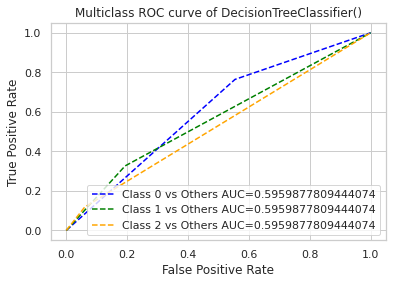

In [ ]:
  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_sm_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+" AUC="+str(test_auc_smote))
  plt.title('Multiclass ROC curve of '+ str(tree))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

### HyperParameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=tree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Initializing the DecisionTreeClassifier
tree1 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, random_state=42)
# Fitting onto the train set
tree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, random_state=42)

In [ ]:
y_train_predcv = tree1.predict(X_train)
y_test_predcv = tree1.predict(X_test)

In [ ]:
print('Training-set accuracy score train: {0:0.4f}'. format(accuracy_score(y_train, y_train_predcv)))
print('Best params Model accuracy score test: {0:0.4f}'. format(accuracy_score(y_test, y_test_predcv)))

Training-set accuracy score train: 0.8133
Best params Model accuracy score test: 0.8116


# Naive Bayes classifier

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# Fitting onto the train set for rus
gnb.fit(x_train_rus,y_train_rus)
# Fitting onto the train set for smote
gnb.fit(x_train_smote,y_train_smote)

GaussianNB()

In [ ]:
y_train_pred1_rus = gnb.predict(x_train_rus)
y_test_pred1_rus = gnb.predict(X_test)
#For Smote
y_train_pred1_smote = gnb.predict(x_train_smote)
y_test_pred1_smote = gnb.predict(X_test)

In [ ]:
#probs
print("\n Probs for smote rus = ",tree.predict_proba(x_train_smote))
print("\n Probs for smote rus = ",tree.predict_proba(X_test))
#Evaluation 
#Accuracy RUS
print("\n Accuracy for train rus = ",accuracy_score(y_train_rus,y_train_pred1_rus))
print("\n Accuracy for test rus = ",accuracy_score(y_test,y_test_pred1_rus))
#Accuracy SMOTE
print("\n Accuracy for train smote = ",accuracy_score(y_train_smote,y_train_pred1_smote))
print("\n Accuracy for test smote = ",accuracy_score(y_test,y_test_pred1_smote))
print('-'*200)
#Confusion Matrix RUS
print("\n Confusion Matrix for train rus = \n",confusion_matrix(y_train_rus,y_train_pred1_rus))
print("\n Confusion Matrix for test rus = \n",confusion_matrix(y_test,y_test_pred1_rus))
#Confusion Matrix SMOTE
print("\n Confusion Matrix for train smote =\n",confusion_matrix(y_train_smote,y_train_pred1_smote))
print("\n Confusion Matrix for test smote =\n",confusion_matrix(y_test,y_test_pred1_smote))
print('-'*200)
#Recall RUS
print("\n recall  for train smote = ",recall_score(y_train_rus,y_train_pred1_rus, average='weighted'))
print("\n recall  for test rus = ",recall_score(y_test,y_test_pred1_rus, average='weighted'))
#Recall SMOTE
print("\n recall  for train smote = ",recall_score(y_train_smote,y_train_pred1_smote, average='weighted'))
print("\n recall  for test smote = ",recall_score(y_test,y_test_pred1_smote, average='weighted'))
print('-'*200)
#Precision RUS
print("\n Precision  for train smote = ",precision_score(y_train_rus,y_train_pred1_rus, average='weighted'))
print("\n Precision  for test rus = ",precision_score(y_test,y_test_pred1_rus, average='weighted'))
#Precision SMOTE
print("\n Precision  for train smote = ",precision_score(y_train_smote,y_train_pred1_smote, average='weighted'))
print("\n Precision  for test smote = ",precision_score(y_test,y_test_pred1_smote, average='weighted'))
print('-'*200)
#F1 Score RUS
print("\n F1 score for train rus = ",f1_score(y_train_rus,y_train_pred1_rus, average='weighted'))
print("\n F1 score for test rus = ",f1_score(y_test,y_test_pred1_rus, average='weighted'))
#F1 Score SMOTE
print("\n F1 score for train smote = ",f1_score(y_train_smote,y_train_pred1_smote, average='weighted'))
print("\n F1 score for test smote = ",f1_score(y_test,y_test_pred1_smote, average='weighted'))
print('-'*200)


 Probs for smote rus =  [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]

 Probs for smote rus =  [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

 Accuracy for train rus =  0.36235955056179775

 Accuracy for test rus =  0.4416291181461759

 Accuracy for train smote =  0.5091129717267322

 Accuracy for test smote =  0.4416291181461759
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

 Confusion Matrix for train rus = 
 [[896 208 676]
 [819 190 771]
 [848  83 849]]

 Confusion Matrix for test rus = 
 [[6959 1642 5135]
 [1373  299 1088]
 [ 282   22  289]]

 Confusion Matrix for train smote =
 [[20768  5015 15422]
 [ 5675  5195 30335]
 [ 2831  1403 36971]]

 Confusion Matrix for test smote =
 [[6959 1642 5135]
 [1373  299 1088]
 [ 282   22  289]]
----------------------------------

In [ ]:
#probs
train_rus_proba = gnb.predict_proba(x_train_rus)
test_rus_proba = gnb.predict_proba(X_test)
#probs
train_sm_proba = gnb.predict_proba(x_train_smote)
test_sm_proba = gnb.predict_proba(X_test)
#ROC-AUCRUS
train_auc_rus=roc_auc_score(y_train_rus,train_rus_proba,average='weighted',multi_class='ovr')
test_auc_rus=roc_auc_score(y_test,test_rus_proba,average='weighted',multi_class='ovr')
#ROC-AUCSMOTE
train_auc_smote=roc_auc_score(y_train_smote,train_sm_proba,average='weighted',multi_class='ovr')
test_auc_smote=roc_auc_score(y_test,test_sm_proba,average='weighted',multi_class='ovr')

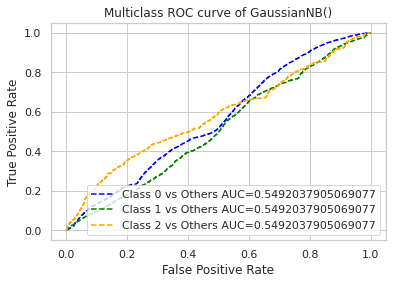

In [ ]:
  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_sm_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+" AUC="+str(test_auc_smote))
  plt.title('Multiclass ROC curve of '+ str(gnb))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
# Fitting onto the train set for rus
knn.fit(x_train_rus,y_train_rus)
# Fitting onto the train set for smote
knn.fit(x_train_smote,y_train_smote)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_train_pred2_rus = gnb.predict(x_train_rus)
y_test_pred2_rus = gnb.predict(X_test)
#For Smote
y_train_pred2_smote = gnb.predict(x_train_smote)
y_test_pred2_smote = gnb.predict(X_test)

In [ ]:
#probs
print("\n Probs for smote rus = ",tree.predict_proba(x_train_smote))
print("\n Probs for smote rus = ",tree.predict_proba(X_test))
#Evaluation 
#Accuracy RUS
print("\n Accuracy for train rus = ",accuracy_score(y_train_rus,y_train_pred2_rus))
print("\n Accuracy for test rus = ",accuracy_score(y_test,y_test_pred2_rus))
#Accuracy SMOTE
print("\n Accuracy for train smote = ",accuracy_score(y_train_smote,y_train_pred2_smote))
print("\n Accuracy for test smote = ",accuracy_score(y_test,y_test_pred2_smote))
print('-'*200)
#Confusion Matrix RUS
print("\n Confusion Matrix for train rus = \n",confusion_matrix(y_train_rus,y_train_pred2_rus))
print("\n Confusion Matrix for test rus = \n",confusion_matrix(y_test,y_test_pred2_rus))
#Confusion Matrix SMOTE
print("\n Confusion Matrix for train smote =\n",confusion_matrix(y_train_smote,y_train_pred2_smote))
print("\n Confusion Matrix for test smote =\n",confusion_matrix(y_test,y_test_pred2_smote))
print('-'*200)
#Recall RUS
print("\n recall  for train smote = ",recall_score(y_train_rus,y_train_pred2_rus, average='weighted'))
print("\n recall  for test rus = ",recall_score(y_test,y_test_pred2_rus, average='weighted'))
#Recall SMOTE
print("\n recall  for train smote = ",recall_score(y_train_smote,y_train_pred2_smote, average='weighted'))
print("\n recall  for test smote = ",recall_score(y_test,y_test_pred2_smote, average='weighted'))
print('-'*200)
#Precision RUS
print("\n Precision  for train smote = ",precision_score(y_train_rus,y_train_pred2_rus, average='weighted'))
print("\n Precision  for test rus = ",precision_score(y_test,y_test_pred2_rus, average='weighted'))
#Precision SMOTE
print("\n Precision  for train smote = ",precision_score(y_train_smote,y_train_pred2_smote, average='weighted'))
print("\n Precision  for test smote = ",precision_score(y_test,y_test_pred2_smote, average='weighted'))
print('-'*200)
#F1 Score RUS
print("\n F1 score for train rus = ",f1_score(y_train_rus,y_train_pred2_rus, average='weighted'))
print("\n F1 score for test rus = ",f1_score(y_test,y_test_pred2_rus, average='weighted'))
#F1 Score SMOTE
print("\n F1 score for train smote = ",f1_score(y_train_smote,y_train_pred2_smote, average='weighted'))
print("\n F1 score for test smote = ",f1_score(y_test,y_test_pred2_smote, average='weighted'))
print('-'*200)


 Probs for smote rus =  [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]

 Probs for smote rus =  [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

 Accuracy for train rus =  0.36235955056179775

 Accuracy for test rus =  0.4416291181461759

 Accuracy for train smote =  0.5091129717267322

 Accuracy for test smote =  0.4416291181461759
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

 Confusion Matrix for train rus = 
 [[896 208 676]
 [819 190 771]
 [848  83 849]]

 Confusion Matrix for test rus = 
 [[6959 1642 5135]
 [1373  299 1088]
 [ 282   22  289]]

 Confusion Matrix for train smote =
 [[20768  5015 15422]
 [ 5675  5195 30335]
 [ 2831  1403 36971]]

 Confusion Matrix for test smote =
 [[6959 1642 5135]
 [1373  299 1088]
 [ 282   22  289]]
----------------------------------

In [ ]:
#probs
train_rus_proba = knn.predict_proba(x_train_rus)
test_rus_proba = knn.predict_proba(X_test)
#probs
train_sm_proba = knn.predict_proba(x_train_smote)
test_sm_proba = knn.predict_proba(X_test)
#ROC-AUCRUS
train_auc_rus=roc_auc_score(y_train_rus,train_rus_proba,average='weighted',multi_class='ovr')
test_auc_rus=roc_auc_score(y_test,test_rus_proba,average='weighted',multi_class='ovr')
#ROC-AUCSMOTE
train_auc_smote=roc_auc_score(y_train_smote,train_sm_proba,average='weighted',multi_class='ovr')
test_auc_smote=roc_auc_score(y_test,test_sm_proba,average='weighted',multi_class='ovr')

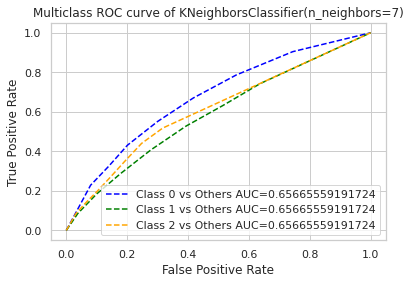

In [ ]:
  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_sm_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+" AUC="+str(test_auc_smote))
  plt.title('Multiclass ROC curve of '+ str(knn))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

In [ ]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)                    ##code idea from kaggle

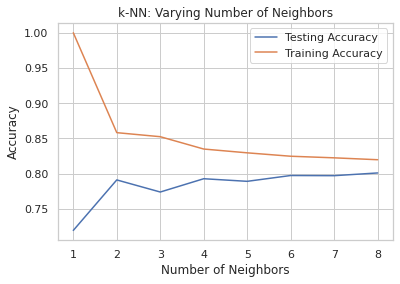

In [ ]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Fitting Random Forest Classification to the Training set
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
# Fitting onto the train set for rus
rfc.fit(x_train_rus,y_train_rus)
# Fitting onto the train set for smote
rfc.fit(x_train_smote,y_train_smote)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
y_train_pred3_rus = rfc.predict(x_train_rus)
y_test_pred3_rus = rfc.predict(X_test)
#For Smote
y_train_pred3_smote = rfc.predict(x_train_smote)
y_test_pred3_smote = rfc.predict(X_test)

In [ ]:
#probs
print("\n Probs for smote rus = ",tree.predict_proba(x_train_smote))
print("\n Probs for smote rus = ",tree.predict_proba(X_test))
#Evaluation 
#Accuracy RUS
print("\n Accuracy for train rus = ",accuracy_score(y_train_rus,y_train_pred3_rus))
print("\n Accuracy for test rus = ",accuracy_score(y_test,y_test_pred3_rus))
#Accuracy SMOTE
print("\n Accuracy for train smote = ",accuracy_score(y_train_smote,y_train_pred3_smote))
print("\n Accuracy for test smote = ",accuracy_score(y_test,y_test_pred3_smote))
print('-'*300)
#Confusion Matrix RUS
print("\n Confusion Matrix for train rus = \n",confusion_matrix(y_train_rus,y_train_pred3_rus))
print("\n Confusion Matrix for test rus = \n",confusion_matrix(y_test,y_test_pred3_rus))
#Confusion Matrix SMOTE
print("\n Confusion Matrix for train smote =\n",confusion_matrix(y_train_smote,y_train_pred3_smote))
print("\n Confusion Matrix for test smote =\n",confusion_matrix(y_test,y_test_pred3_smote))
print('-'*300)
#Recall RUS
print("\n recall  for train smote = ",recall_score(y_train_rus,y_train_pred3_rus, average='weighted'))
print("\n recall  for test rus = ",recall_score(y_test,y_test_pred3_rus, average='weighted'))
#Recall SMOTE
print("\n recall  for train smote = ",recall_score(y_train_smote,y_train_pred3_smote, average='weighted'))
print("\n recall  for test smote = ",recall_score(y_test,y_test_pred3_smote, average='weighted'))
print('-'*300)
#Precision RUS
print("\n Precision  for train smote = ",precision_score(y_train_rus,y_train_pred3_rus, average='weighted'))
print("\n Precision  for test rus = ",precision_score(y_test,y_test_pred3_rus, average='weighted'))
#Precision SMOTE
print("\n Precision  for train smote = ",precision_score(y_train_smote,y_train_pred3_smote, average='weighted'))
print("\n Precision  for test smote = ",precision_score(y_test,y_test_pred3_smote, average='weighted'))
print('-'*300)
#F1 Score RUS
print("\n F1 score for train rus = ",f1_score(y_train_rus,y_train_pred3_rus, average='weighted'))
print("\n F1 score for test rus = ",f1_score(y_test,y_test_pred3_rus, average='weighted'))
#F1 Score SMOTE
print("\n F1 score for train smote = ",f1_score(y_train_smote,y_train_pred3_smote, average='weighted'))
print("\n F1 score for test smote = ",f1_score(y_test,y_test_pred3_smote, average='weighted'))
print('-'*300)


 Probs for smote rus =  [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]

 Probs for smote rus =  [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

 Accuracy for train rus =  0.952247191011236

 Accuracy for test rus =  0.7475569079524841

 Accuracy for train smote =  0.991400719977349

 Accuracy for test smote =  0.7475569079524841
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

 Confusion Matrix for train rus = 
 [[1777    2    1]
 [ 121 1658    1]
 [  95   35 1650]]

 Confusion Matrix for test rus = 
 [[12029  1470   237]
 [ 1897   710   153]
 [  364   193    36]]

 Confusion Matrix for train smote =
 [[41103    84    18]
 [  644 40501    60]
 [  111   146 40948]]

 Confusion

In [ ]:
#probs
train_rus_proba = rfc.predict_proba(x_train_rus)
test_rus_proba = rfc.predict_proba(X_test)
#probs
train_sm_proba = rfc.predict_proba(x_train_smote)
test_sm_proba = rfc.predict_proba(X_test)
#ROC-AUCRUS
train_auc_rus=roc_auc_score(y_train_rus,train_rus_proba,average='weighted',multi_class='ovr')
test_auc_rus=roc_auc_score(y_test,test_rus_proba,average='weighted',multi_class='ovr')
#ROC-AUCSMOTE
train_auc_smote=roc_auc_score(y_train_smote,train_sm_proba,average='weighted',multi_class='ovr')
test_auc_smote=roc_auc_score(y_test,test_sm_proba,average='weighted',multi_class='ovr')

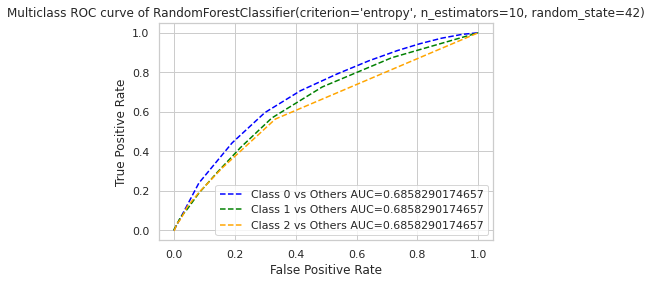

In [ ]:
  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_sm_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+" AUC="+str(test_auc_smote))
  plt.title('Multiclass ROC curve of '+ str(rfc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

# Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing, model_selection, metrics
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [ ]:
models = [
           ['Decision Tree: ',DecisionTreeClassifier()],
           ['RandomForestClassifier: ', RandomForestClassifier()],
           ['KNeighborsClassifier: ',  KNeighborsClassifier()],
          ['XGBBoost: ',XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)],
           #['SVR:' , SVR(kernel='rbf')],
           ['Naive Bayes classifier: ', GaussianNB()],
           #['Stochastic Gradient Descent: ',SGDClassifier()],
          # ['SVM Model: ',SVC()],
           ['BernoulliNB: ',BernoulliNB()],
           ['MultinomialNB: ',MultinomialNB()],
           ['Logistics: ',LogisticRegression()]
           ]

In [ ]:
#Run all the proposed models and update the information in a list model_data
import time


model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data['Model_Name'] = name
    start = time.time()
    curr_model.fit(x_train_smote,y_train_smote)
    end = time.time()
    curr_model_data['Train_Time'] = end - start
    curr_model_data['Model Score']= curr_model.score(X_test,y_test)
    curr_model_data['Train f1 Score_smote']=f1_score(y_train_smote,curr_model.predict(x_train_smote),average='macro')
    curr_model_data['Train Recall_smote']=recall_score(y_train_smote,curr_model.predict(x_train_smote),average='macro')
    curr_model_data['Train Precision_smote']=precision_score(y_train_smote,curr_model.predict(x_train_smote),average='macro')
    curr_model_data['Train Recall_rus']=recall_score(y_train_smote,curr_model.predict(x_train_smote),average='macro')
    curr_model_data['Train Precision_rus']=precision_score(y_train_smote,curr_model.predict(x_train_smote),average='macro')
    curr_model_data['test f1 Score_smote']=f1_score(y_test,curr_model.predict(X_test),average='macro')
    curr_model_data['test Recall_smote']=recall_score(y_test,curr_model.predict(X_test),average='macro')
    curr_model_data['test precision_smote']=precision_score(y_test,curr_model.predict(X_test),average='macro')
    #curr_model_data['Train f1 Score_rus']=f1_score(y_train_smote,curr_model.predict(x_train_smote),average='macro')
    curr_model_data['test f1 Score_rus']=f1_score(y_test,curr_model.predict(X_test),average='macro')
    curr_model_data['test Recall_rus']=recall_score(y_test,curr_model.predict(X_test),average='macro')
    curr_model_data['test precision_rus']=precision_score(y_test,curr_model.predict(X_test),average='macro')
    model_data.append(curr_model_data)

In [ ]:
df1 = pd.DataFrame(model_data)
df1

,Model_Name,Train_Time,Model Score,Train f1 Score_smote,Train Recall_smote,Train Precision_smote,Train Recall_rus,Train Precision_rus,test f1 Score_smote,test Recall_smote,test precision_smote,test f1 Score_rus,test Recall_rus,test precision_rus
0,Decision Tree:,1.029054,0.668734,0.999879,0.999879,0.999879,0.999879,0.999879,0.384762,0.396479,0.382683,0.384762,0.396479,0.382683
1,RandomForestClassifier:,20.699792,0.754989,0.999854,0.999854,0.999854,0.999854,0.999854,0.409004,0.404299,0.417025,0.409004,0.404299,0.417025
2,KNeighborsClassifier:,0.375259,0.551407,0.857143,0.860769,0.871369,0.860769,0.871369,0.363511,0.422769,0.384185,0.363511,0.422769,0.384185
3,XGBBoost:,106.126624,0.782843,0.911614,0.913093,0.915362,0.913093,0.915362,0.418113,0.407207,0.448288,0.418113,0.407207,0.448288
4,Naive Bayes classifier:,0.043804,0.441629,0.460894,0.509113,0.534559,0.509113,0.534559,0.276898,0.367437,0.334856,0.276898,0.367437,0.334856
5,BernoulliNB:,0.049071,0.676049,0.440798,0.545217,0.543092,0.545217,0.543092,0.302843,0.344513,0.487309,0.302843,0.344513,0.487309
6,MultinomialNB:,0.042625,0.599333,0.457271,0.480047,0.467021,0.480047,0.467021,0.382754,0.459286,0.392758,0.382754,0.459286,0.392758
7,Logistics:,7.554809,0.595471,0.531035,0.542143,0.533779,0.542143,0.533779,0.379765,0.466334,0.393153,0.379765,0.466334,0.393153


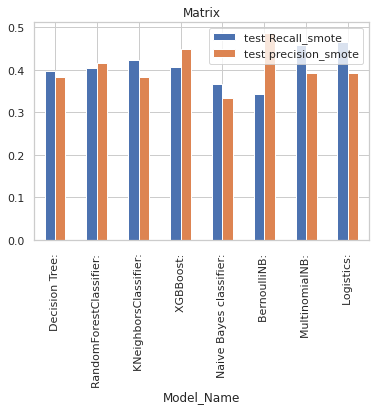

In [ ]:
df1.plot(x="Model_Name", y=["test Recall_smote", "test precision_smote"], title = 'Matrix' , kind="bar")

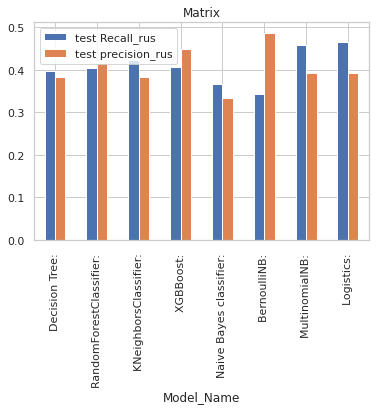

In [ ]:
df1.plot(x="Model_Name", y=["test Recall_rus", "test precision_rus"], title = 'Matrix' , kind="bar")

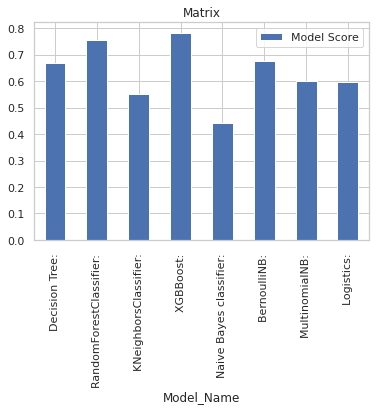

In [ ]:
df1.plot(x="Model_Name", y="Model Score", title = 'Matrix' , kind="bar")

# Conclusion

n EDA, we observed that Email_Campaign_Type was the most important feature. If your Email_Campaign_Type was 1, there is a 90% likelihood of your Email to be read/acknowledged.

It was observed that both Time_Email_Sent and Customer_Location were insignificant in determining the Email_status. The ratio of the Email_Status was same irrespective of the demographic or the time frame the emails were sent on.

As the word_count increases beyond the 600 mark we see that there is a high possibility of that email being ignored. The ideal mark is 400-600. No one is interested in reading long mails !

